In [2]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pickle
import skimage
import skimage.io
import skimage.feature
% matplotlib inline

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [3]:
train_img_folder = "./dlcv_final_2_dataset/train/"
train_img_path = sorted(os.listdir(train_img_folder))
train_X_img = [skimage.io.imread(os.path.join(train_img_folder, path))
              for path in train_img_path]
with open("./dlcv_final_2_dataset/train_id.txt","r") as f:
    train_y = f.readlines()
    train_y = [line.strip().split(" ")[1] for line in train_y]
    
    
valid_img_folder = "./dlcv_final_2_dataset/val/"
valid_img_path = sorted(os.listdir(valid_img_folder))
valid_X_img = [skimage.io.imread(os.path.join(valid_img_folder, path))
              for path in valid_img_path]

with open("./dlcv_final_2_dataset/val_id.txt","r") as f:
    valid_y = f.readlines()
    valid_y = [line.strip().split(" ")[1] for line in valid_y]

    
# test_img_folder = "./dlcv_final_2_dataset/test/"
# test_img_path = sorted(os.listdir(test_img_folder))
# test_X_img = [skimage.io.imread(os.path.join(test_img_folder, path))
#               for path in test_img_path]

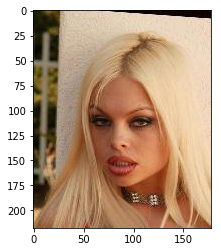

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


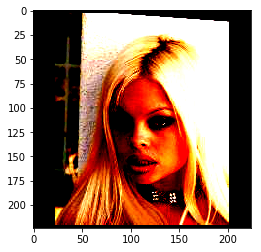

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


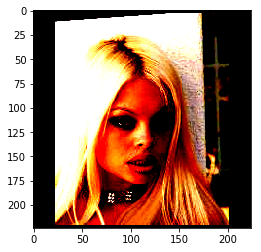

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


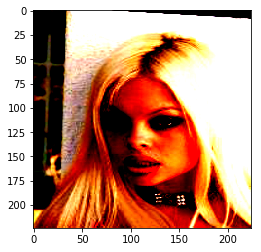

In [9]:
id = 120
def normalize(image):
    '''
    normalize for pre-defined model input
    '''
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    transform_input = transforms.Compose([
             transforms.ToPILImage(),
            transforms.Pad((23,3), fill=0, padding_mode='constant'),
#              transforms.CenterCrop((120,90)),
    #         transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            normalize
        ])
    return transform_input(image)

def normalize_flip_aug(image):
    '''
    normalize for pre-defined model input
    '''
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    transform_input = transforms.Compose([
             transforms.ToPILImage(),
            transforms.Pad((23,3), fill=0, padding_mode='constant'),
#              transforms.CenterCrop((120,90)),
            transforms.RandomHorizontalFlip(1),
            transforms.ToTensor(),
            normalize
        ])
    return transform_input(image)

def normalize_large(image):
    '''
    normalize for pre-defined model input
    '''
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    transform_input = transforms.Compose([
             transforms.ToPILImage(),
            transforms.Resize((224,224)),
#              transforms.CenterCrop((120,90)),
#             transforms.RandomHorizontalFlip(1),
            transforms.ToTensor(),
            normalize
        ])
    return transform_input(image)

image_norm1 = normalize(valid_X_img[id])
image_norm2 = normalize_flip_aug(valid_X_img[id])
image_norm3 = normalize_large(valid_X_img[id])
plt.imshow(valid_X_img[id])
plt.show()
plt.imshow(image_norm1.numpy().transpose(1,2,0))
plt.show()
plt.imshow(image_norm2.numpy().transpose(1,2,0))
plt.show()
plt.imshow(image_norm3.numpy().transpose(1,2,0))
plt.show()

In [ ]:
np.array(image_norm1).shape

pad image and output pytorch tensor

In [ ]:
train_X = [normalize_flip_aug(img) for img in train_X_img]
train_X = torch.stack(train_X)

valid_X = [normalize_flip_aug(img) for img in valid_X_img]
valid_X = torch.stack(valid_X)

test_X = [normalize_flip_aug(img) for img in test_X_img]
test_X = torch.stack(test_X)

In [ ]:
# store them
with open("./features/train_X_flip.pkl", "wb") as f:
    pickle.dump(train_X, f)

with open("./features/valid_X_flip.pkl", "wb") as f:
    pickle.dump(valid_X, f)

with open("./features/test_X_flip.pkl", "wb") as f:
    pickle.dump(test_X, f)
   

crop image and output numpy tensor

In [ ]:
test_X = [np.array(normalize(img)) for img in test_X_img]
test_X = np.stack(test_X)

train_X = [np.array(normalize(img)) for img in train_X_img]
train_X = np.stack(train_X)

valid_X = [np.array(normalize(img)) for img in valid_X_img]
valid_X = np.stack(valid_X)



In [ ]:
np.save("./features/train_X_218.npy", train_X)
np.save("./features/valid_X_218.npy", valid_X)
np.save("./features/test_X_218.npy", test_X)

original image and output numpy tensor

In [ ]:
np.save("./features/train_X_original.npy", np.array(train_X_img))
np.save("./features/valid_X_original.npy", np.array(valid_X_img))
np.save("./features/test_X_original.npy", np.array(test_X_img))

crop image and output numpy

In [ ]:
train_X.size()

In [ ]:
# store them
with open("./features/train_X.pkl", "wb") as f:
    pickle.dump(train_X, f)

with open("./features/valid_X.pkl", "wb") as f:
    pickle.dump(valid_X, f)

with open("./features/test_X.pkl", "wb") as f:
    pickle.dump(test_X, f)
   

In [ ]:
with open("./features/train_y.pkl", "wb") as f:
    pickle.dump(train_y, f)

with open("./features/valid_y.pkl", "wb") as f:
    pickle.dump(valid_y, f)